In [6]:
import pandas as pd
# Load the Excel file
file_path = "/content/FDI data.xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names
xls.sheet_names

['1']

In [9]:
df = pd.read_excel(xls, sheet_name="1")
df.head()

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [10]:
missing_values = df.isnull().sum()

data_types = df.dtypes

summary_stats = df.describe()

missing_values, data_types, summary_stats


(Sector     0
 2000-01    0
 2001-02    0
 2002-03    0
 2003-04    0
 2004-05    0
 2005-06    0
 2006-07    0
 2007-08    0
 2008-09    0
 2009-10    0
 2010-11    0
 2011-12    0
 2012-13    0
 2013-14    0
 2014-15    0
 2015-16    0
 2016-17    0
 dtype: int64,
 Sector      object
 2000-01    float64
 2001-02    float64
 2002-03    float64
 2003-04    float64
 2004-05    float64
 2005-06    float64
 2006-07    float64
 2007-08    float64
 2008-09    float64
 2009-10    float64
 2010-11    float64
 2011-12    float64
 2012-13    float64
 2013-14    float64
 2014-15    float64
 2015-16    float64
 2016-17    float64
 dtype: object,
           2000-01     2001-02     2002-03     2003-04     2004-05  \
 count   63.000000   63.000000   63.000000   63.000000   63.000000   
 mean    37.757302   63.931587   42.925714   34.727778   51.090317   
 std    112.227860  157.878737   86.606439   67.653735  101.934873   
 min      0.000000    0.000000    0.000000    0.000000    0.000000   
 25%   

DATA IS CLEAN AND PREPROCESSED

<ipython-input-11-dded623d41c9>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_melted, x="Year", y="FDI (Million USD)", estimator="sum", ci=None, marker="o")


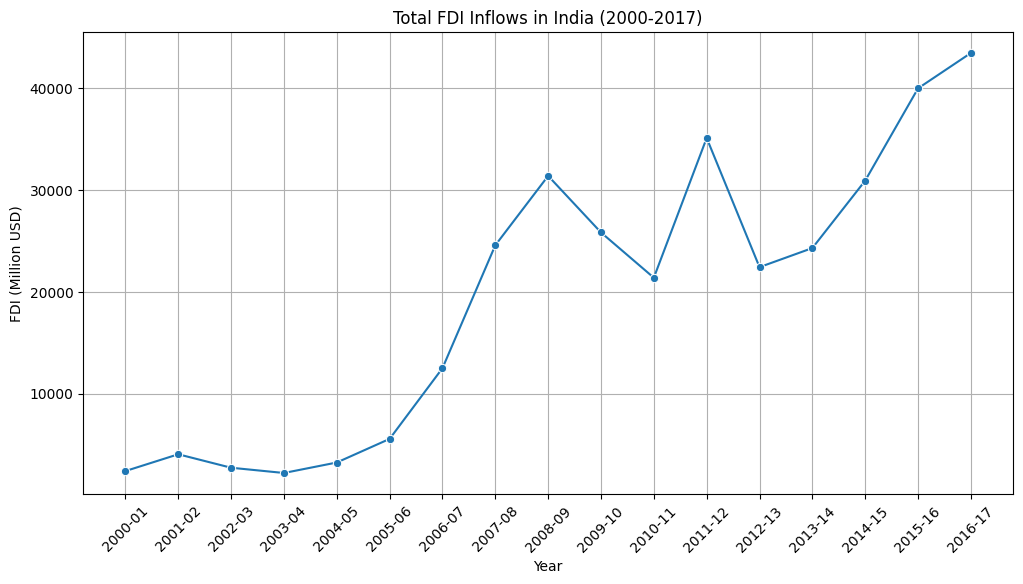

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df_melted = df.melt(id_vars=["Sector"], var_name="Year", value_name="FDI (Million USD)")
df_melted["Year"] = df_melted["Year"].astype(str)

# Overall FDI trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x="Year", y="FDI (Million USD)", estimator="sum", ci=None, marker="o")
plt.xticks(rotation=45)
plt.title("Total FDI Inflows in India (2000-2017)")
plt.xlabel("Year")
plt.ylabel("FDI (Million USD)")
plt.grid(True)
plt.show()


<ipython-input-12-2bdf3627e071>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="viridis")


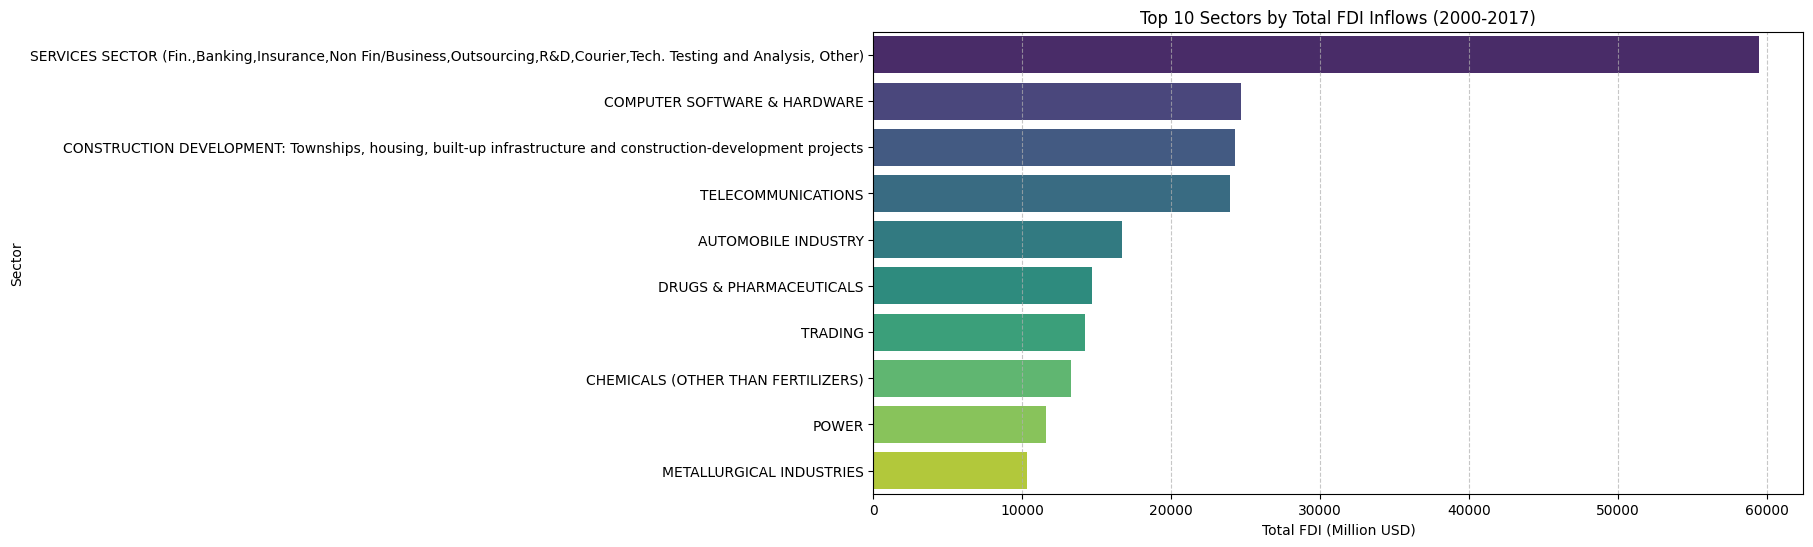

In [12]:
# Top 10 sectors receiving highest total FDI from 2000-2017
top_sectors = df.set_index("Sector").sum(axis=1).nlargest(10)

# Bar plot for top sectors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="viridis")
plt.title("Top 10 Sectors by Total FDI Inflows (2000-2017)")
plt.xlabel("Total FDI (Million USD)")
plt.ylabel("Sector")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()


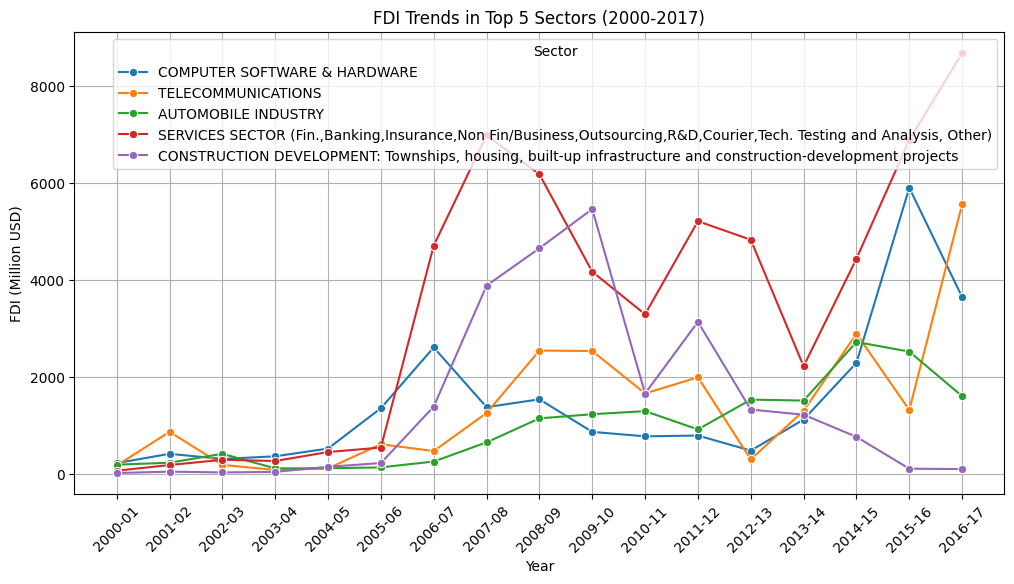

In [13]:
top_5_sectors = top_sectors.index[:5]
df_top_sectors = df_melted[df_melted["Sector"].isin(top_5_sectors)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_sectors, x="Year", y="FDI (Million USD)", hue="Sector", marker="o")
plt.xticks(rotation=45)
plt.title("FDI Trends in Top 5 Sectors (2000-2017)")
plt.xlabel("Year")
plt.ylabel("FDI (Million USD)")
plt.legend(title="Sector")
plt.grid(True)
plt.show()


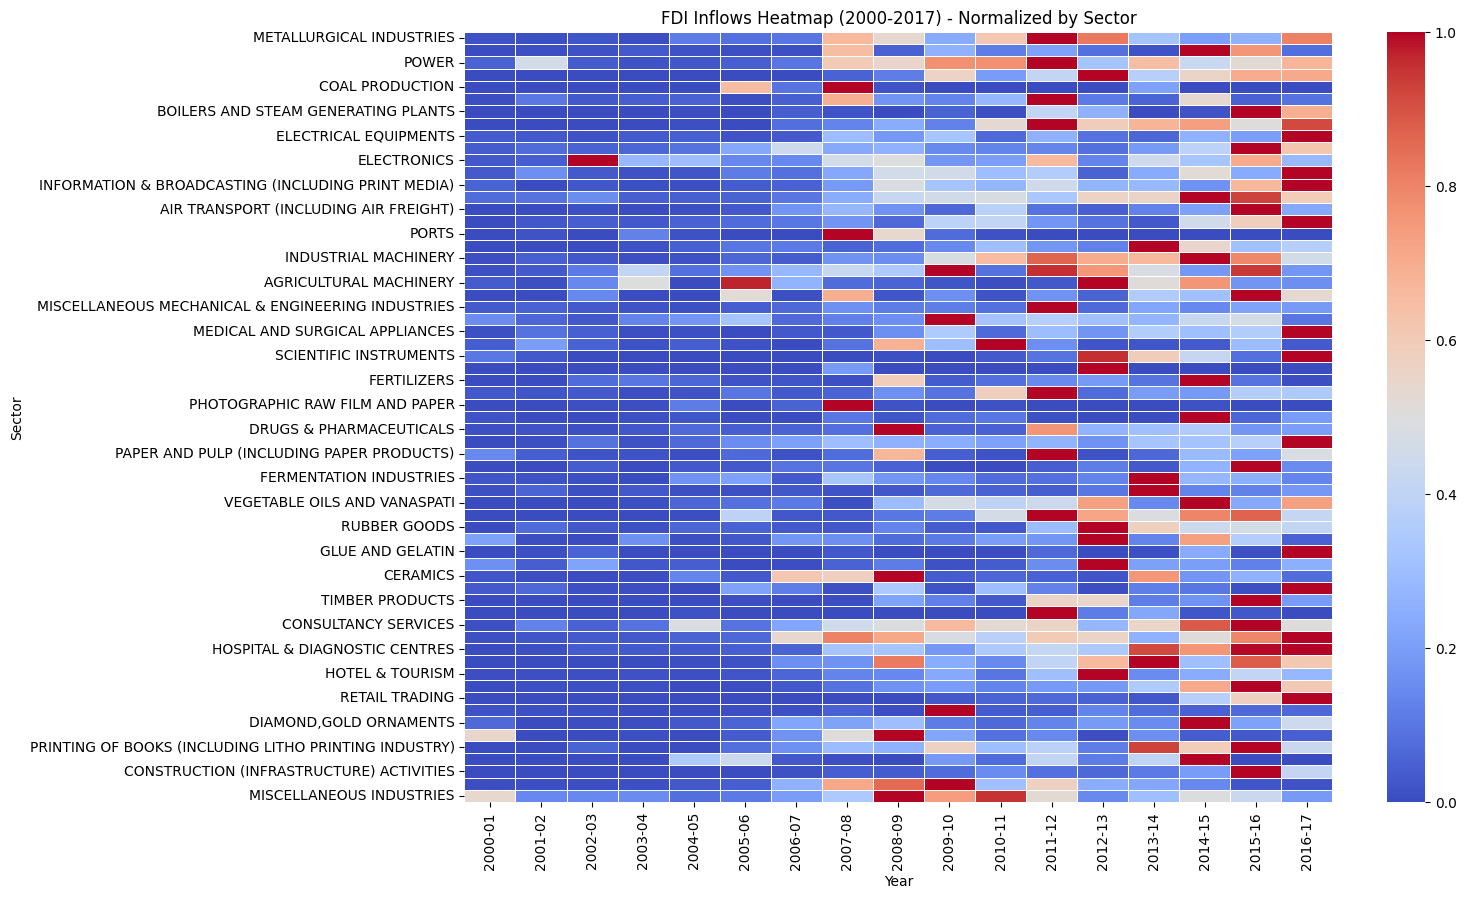

In [14]:

heatmap_data = df.set_index("Sector")
heatmap_data_normalized = heatmap_data.div(heatmap_data.max(axis=1), axis=0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data_normalized, cmap="coolwarm", linewidths=0.5, cbar=True)
plt.title("FDI Inflows Heatmap (2000-2017) - Normalized by Sector")
plt.xlabel("Year")
plt.ylabel("Sector")
plt.show()
